# MAB with 1 decision : jump or not jump (2 arms)

In [ ]:
import random
import matplotlib.pyplot as plt
import subprocess
import tempfile
import json

def train(run_game_function, weight_size, generations=1000, epsilon=0, epsilon_decay=1, name="No Name", nameOfTheFile="jeuClassique.py"):
    best_weights = [random.uniform(-1, 1) for _ in range(weight_size)]
    best_score = run_game_function(best_weights)

    epsilon_min = 0
    scores = []
    moving_avg = []
    epsilons = []

    for gen in range(generations):
        epsilons.append(epsilon)

        if random.random() < epsilon:
            weights = [random.uniform(-2, 2) for _ in range(weight_size)]
        else:
            weights = [w + random.uniform(-0.2, 0.2) for w in best_weights]

        score = run_game_function(weights)

        scores.append(score)
        avg = sum(scores[-100:]) / min(len(scores), 100)
        moving_avg.append(avg)

        print(f"Génération {gen} | Score: {score:.2f} | ε={epsilon:.4f}")

        if score > best_score:
            best_score = score
            best_weights = weights
            print("🎉 Nouveau meilleur score:", best_score)

        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    print("\n--- Entraînement terminé ---")
    print("Meilleur score:", best_score)
    print("Poids optimaux trouvés:", best_weights)
    final_weights = best_weights

    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Générations")
    ax1.set_ylabel("Score", color='tab:blue')
    ax1.plot(scores, label="Scores", color='tab:blue', alpha=0.5)
    ax1.plot(moving_avg, label="Moyenne mobile 100 générations", color='tab:red', linestyle='dashed')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel("ε (Epsilon)", color='tab:green')
    ax2.plot(epsilons, label="Épsilon", color='tab:green', linestyle='dotted')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    fig.tight_layout()
    plt.title(name)
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.show()

    print("Lancement d'une partie avec les meilleurs coefficients ...")


    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
        json.dump(final_weights, f)
        temp_file_path = f.name

    subprocess.run(["python", nameOfTheFile, temp_file_path])



## Flappy bird CLASSIQUE

In [7]:
from jeuClassique import run_game as run_game_classique

### Choix des paramètres

The 5 parameters are: the vertical distance from the top part of the next pipe, the vertical distance from the bottom part of the next pipe, the distance to the next pipe, the falling speed (vertical velocity), and the altitude.

```python
def should_jump(bird, pipes, weights):
    ...
    decision = (weights[0] * dy_top + 
                weights[1] * dy_bottom + 
                weights[2] * dx + 
                weights[3] * v + 
                weights[4] * altitude) 

    return decision < 0



SCORE = number_of_pipes * 1000 + distance


### Epsilon greedy

In [ ]:
train(run_game_function=run_game_classique, weight_size=3, generations=10000, epsilon=0.1, epsilon_decay=1, name="Mode Classique", nameOfTheFile="jeuClassique.py")

### Epsilon greedy decaying

Génération 0 | Score: 35.00 | ε=1.0000
Génération 1 | Score: 55.00 | ε=0.9950
Génération 2 | Score: 55.00 | ε=0.9900
Génération 3 | Score: 35.00 | ε=0.9851
Génération 4 | Score: 331.00 | ε=0.9801
Génération 5 | Score: 55.00 | ε=0.9752
Génération 6 | Score: 35.00 | ε=0.9704
Génération 7 | Score: 35.00 | ε=0.9655
Génération 8 | Score: 35.00 | ε=0.9607
Génération 9 | Score: 55.00 | ε=0.9559
Génération 10 | Score: 35.00 | ε=0.9511
Génération 11 | Score: 35.00 | ε=0.9464
Génération 12 | Score: 35.00 | ε=0.9416
Génération 13 | Score: 35.00 | ε=0.9369
Génération 14 | Score: 3003.00 | ε=0.9322
Génération 15 | Score: 55.00 | ε=0.9276
Génération 16 | Score: 55.00 | ε=0.9229
Génération 17 | Score: 18478.00 | ε=0.9183
🎉 Nouveau meilleur score: 18478
Génération 18 | Score: 35.00 | ε=0.9137
Génération 19 | Score: 55.00 | ε=0.9092
Génération 20 | Score: 15045.00 | ε=0.9046
Génération 21 | Score: 4241.00 | ε=0.9001
Génération 22 | Score: 55.00 | ε=0.8956
Génération 23 | Score: 55.00 | ε=0.8911
Générat

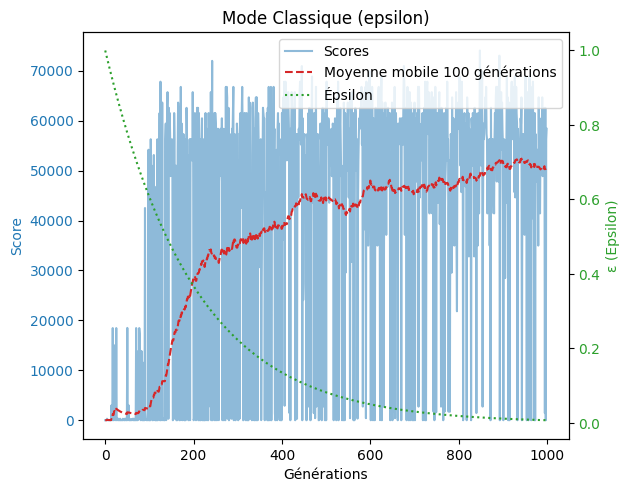

Lancement d'une partie avec les meilleurs coefficients ...


In [10]:
train(run_game_function=run_game_classique, weight_size=5, generations=1000, epsilon=1, epsilon_decay=0.995, name="Mode Classique", nameOfTheFile="jeuClassique.py")

### No epsilon greedy

In [ ]:
train(run_game_function=run_game_classique, weight_size=5, generations=1000, epsilon=0, epsilon_decay=0, name="Mode Classique", nameOfTheFile="jeuClassique.py")

## Flappy Bird complex version

We add complexity to the game : some wind, moving pipes and unfazed pipes

In [27]:
from jeuComplexe import run_game_complexe

### Epsilon greedy decaying

7
1.1573810101395825
Génération 0 | Score: 41.00 | ε=1.0000
7
-0.7083143895449004
Génération 1 | Score: 25176.00 | ε=0.9950
🎉 Nouveau meilleur score: 25176
7
1.3507761017313107
Génération 2 | Score: 41.00 | ε=0.9900
7
-1.9129929899210647
Génération 3 | Score: 30.00 | ε=0.9851
7
0.995013928497781
Génération 4 | Score: 31.00 | ε=0.9801
7
-0.7396538901248637
Génération 5 | Score: 32.00 | ε=0.9752
7
-0.04987461203353982
Génération 6 | Score: 41.00 | ε=0.9704
7
-1.4925180323592695
Génération 7 | Score: 41.00 | ε=0.9655
7
-0.5587679061022301
Génération 8 | Score: 32.00 | ε=0.9607
7
1.7828684202746827
Génération 9 | Score: 31.00 | ε=0.9559
7
0.995933807221177
Génération 10 | Score: 32.00 | ε=0.9511
7
-1.17273334735998
Génération 11 | Score: 33.00 | ε=0.9464
7
-1.7480077006406312
Génération 12 | Score: 41.00 | ε=0.9416
7
0.7989722615647166
Génération 13 | Score: 41.00 | ε=0.9369
7
0.16632069017990103
Génération 14 | Score: 32.00 | ε=0.9322
7
-1.939958286226183
Génération 15 | Score: 41.00 | ε=

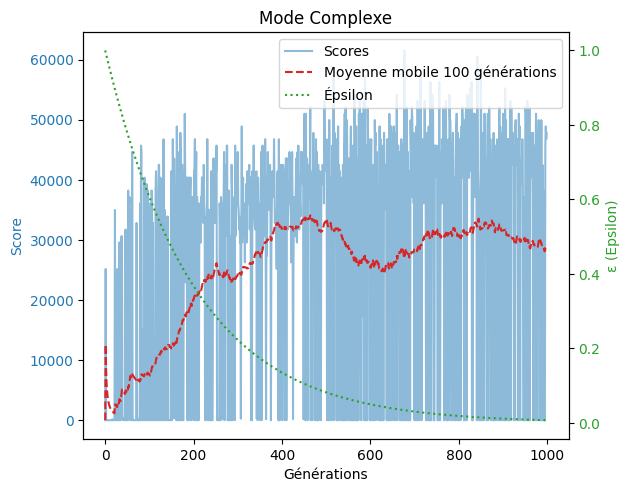

Lancement d'une partie avec les meilleurs coefficients'...


In [ ]:
train(run_game_function=run_game_complexe, weight_size=8, generations=1000, epsilon=1, epsilon_decay=0.995, name="Mode Complexe", nameOfTheFile="jeuComplexe.py")

This is easily getting the perfect score, we need to raise the difficulty!

# Flappy bird with bonus points

In [2]:
from jeuClassiqueBonus import run_game_classique_bonus
from jeuClassiqueBonusSecondDegre import run_game_classique_bonus as run_game_classique_bonus_second_degre

pygame 2.6.1 (SDL 2.28.4, Python 3.12.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


Génération 0 | Score: 41.00 | ε=1.0000
🎉 Nouveau meilleur score: 41
Génération 1 | Score: 347.00 | ε=1.0000
🎉 Nouveau meilleur score: 347
Génération 2 | Score: 41.00 | ε=1.0000
Génération 3 | Score: 31.00 | ε=1.0000
Génération 4 | Score: 41.00 | ε=1.0000
Génération 5 | Score: 41.00 | ε=1.0000
Génération 6 | Score: 31.00 | ε=0.9999
Génération 7 | Score: 33.00 | ε=0.9999
Génération 8 | Score: 41.00 | ε=0.9999
Génération 9 | Score: 32.00 | ε=0.9999
Génération 10 | Score: 41.00 | ε=0.9999
Génération 11 | Score: 41.00 | ε=0.9999
Génération 12 | Score: 41.00 | ε=0.9999
Génération 13 | Score: 32.00 | ε=0.9999
Génération 14 | Score: 31.00 | ε=0.9999
Génération 15 | Score: 32.00 | ε=0.9999
Génération 16 | Score: 41.00 | ε=0.9998
Génération 17 | Score: 33.00 | ε=0.9998
Génération 18 | Score: 41.00 | ε=0.9998
Génération 19 | Score: 41.00 | ε=0.9998
Génération 20 | Score: 332.00 | ε=0.9998
Génération 21 | Score: 41.00 | ε=0.9998
Génération 22 | Score: 41.00 | ε=0.9998
Génération 23 | Score: 32.00 

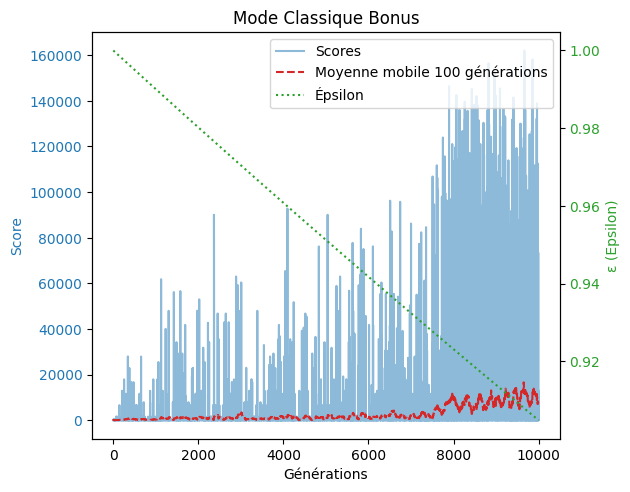

Lancement d'une partie avec les meilleurs coefficients ...


In [8]:
train(run_game_function=run_game_classique_bonus, weight_size=7, generations=10000, epsilon=1, epsilon_decay=0.99999, name="Mode Classique Bonus", nameOfTheFile="jeuClassiqueBonus.py")

Génération 0 | Score: 31.00 | ε=1.0000
Génération 1 | Score: 32.00 | ε=0.9995
Génération 2 | Score: 386.00 | ε=0.9990
Génération 3 | Score: 33.00 | ε=0.9985
Génération 4 | Score: 32.00 | ε=0.9980
Génération 5 | Score: 41.00 | ε=0.9975
Génération 6 | Score: 333.00 | ε=0.9970
Génération 7 | Score: 41.00 | ε=0.9965
Génération 8 | Score: 31.00 | ε=0.9960
Génération 9 | Score: 6633.00 | ε=0.9955
🎉 Nouveau meilleur score: 6633
Génération 10 | Score: 334.00 | ε=0.9950
Génération 11 | Score: 334.00 | ε=0.9945
Génération 12 | Score: 41.00 | ε=0.9940
Génération 13 | Score: 6628.00 | ε=0.9935
Génération 14 | Score: 31.00 | ε=0.9930
Génération 15 | Score: 338.00 | ε=0.9925
Génération 16 | Score: 330.00 | ε=0.9920
Génération 17 | Score: 41.00 | ε=0.9915
Génération 18 | Score: 41.00 | ε=0.9910
Génération 19 | Score: 281.00 | ε=0.9905
Génération 20 | Score: 31.00 | ε=0.9900
Génération 21 | Score: 41.00 | ε=0.9896
Génération 22 | Score: 41.00 | ε=0.9891
Génération 23 | Score: 31.00 | ε=0.9886
Générati

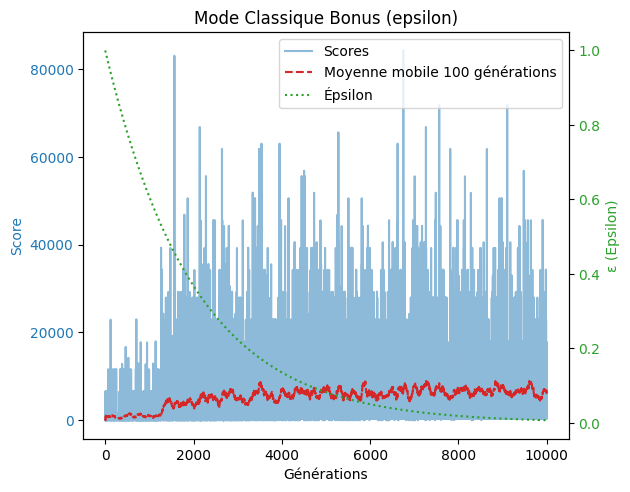

Lancement d'une partie avec les meilleurs coefficients ...


In [12]:
train(run_game_function=run_game_classique_bonus_second_degre, weight_size=7, generations=10000, epsilon=1, epsilon_decay=0.9995, name="Mode Classique Bonus", nameOfTheFile="jeuClassiqueBonusSecondDegre.py")

# Flappy bird with 2 decisions : jumps and ability

In [1]:
import random
import matplotlib.pyplot as plt
import json
import tempfile
import subprocess

def train_2_decisions(run_game_function, weight_size, generations=1000, epsilon=0, epsilon_decay=1, name="No Name", nameOfTheFile="jeuPowerUP.py"):
    weight_size_jump, weight_size_invincibility = weight_size 
    best_weights_jump = [random.uniform(-1, 1) for _ in range(weight_size_jump)]
    best_weights_powerUP = [random.uniform(-1, 1) for _ in range(weight_size_invincibility)]
    best_score = run_game_function(best_weights_jump, best_weights_powerUP)

    epsilon_min = 0
    scores = []
    moving_avg = []
    epsilons = []

    for gen in range(generations):
        epsilons.append(epsilon)

        if random.random() < epsilon:
            weights_jump = [random.uniform(-2, 2) for _ in range(weight_size_jump)]
            weights_invincibility = [random.uniform(-2, 2) for _ in range(weight_size_invincibility)]
        else:
            weights_jump = [w + random.uniform(-0.2, 0.2) for w in best_weights_jump]
            weights_invincibility = [w + random.uniform(-0.2, 0.2) for w in best_weights_powerUP]
        
        score = run_game_function(weights_jump, weights_invincibility)

        scores.append(score)
        avg = sum(scores[-100:]) / min(len(scores), 100)
        moving_avg.append(avg)

        print(f"Génération {gen} | Score: {score:.2f} | ε={epsilon:.4f}")

        if score > best_score:
            best_score = score
            best_weights_jump = weights_jump
            best_weights_powerUP = weights_invincibility

            print("🎉 Nouveau meilleur score:", best_score)

        epsilon = max(epsilon_min, epsilon * epsilon_decay)

    print("\n--- Entraînement terminé ---")
    print("Meilleur score:", best_score)
    print("Poids saut :", best_weights_jump)
    print("Poids power up :", best_weights_powerUP)

    final_weights = (best_weights_jump, best_weights_powerUP)

    # Tracé
    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Générations")
    ax1.set_ylabel("Score")
    ax1.plot(scores, label="Scores", color='blue')
    ax1.plot(moving_avg, label="Moyenne mobile 100 générations", color='red', linestyle='dashed')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel("ε (epsilon)")
    ax2.plot(epsilons, label="Epsilon", color='green', linestyle='dotted')
    ax2.tick_params(axis='y')

    fig.suptitle(name)
    fig.legend(loc='upper left')
    plt.show()
    print("Lancement d'une partie avec les meilleurs coefficients ...")

    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
        json.dump(final_weights, f)
        temp_file_path = f.name

    subprocess.run(["python", nameOfTheFile, temp_file_path])


In [3]:
from jeuPowerUP import run_game_powerUP

pygame 2.6.1 (SDL 2.28.4, Python 3.12.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


Génération 0 | Score: 41.00 | ε=1.0000
🎉 Nouveau meilleur score: 41
Génération 1 | Score: 41.00 | ε=1.0000
Génération 2 | Score: 41.00 | ε=0.9999
Génération 3 | Score: 41.00 | ε=0.9999
Génération 4 | Score: 41.00 | ε=0.9998
Génération 5 | Score: 41.00 | ε=0.9998
Génération 6 | Score: 32.00 | ε=0.9997
Génération 7 | Score: 41.00 | ε=0.9997
Génération 8 | Score: 41.00 | ε=0.9996
Génération 9 | Score: 41.00 | ε=0.9996
Génération 10 | Score: 32.00 | ε=0.9995
Génération 11 | Score: 335.00 | ε=0.9995
🎉 Nouveau meilleur score: 335
Génération 12 | Score: 41.00 | ε=0.9994
Génération 13 | Score: 31.00 | ε=0.9994
Génération 14 | Score: 31.00 | ε=0.9993
Génération 15 | Score: 41.00 | ε=0.9993
Génération 16 | Score: 41.00 | ε=0.9992
Génération 17 | Score: 41.00 | ε=0.9992
Génération 18 | Score: 31.00 | ε=0.9991
Génération 19 | Score: 41.00 | ε=0.9991
Génération 20 | Score: 31.00 | ε=0.9990
Génération 21 | Score: 32.00 | ε=0.9990
Génération 22 | Score: 32.00 | ε=0.9989
Génération 23 | Score: 41.00 |

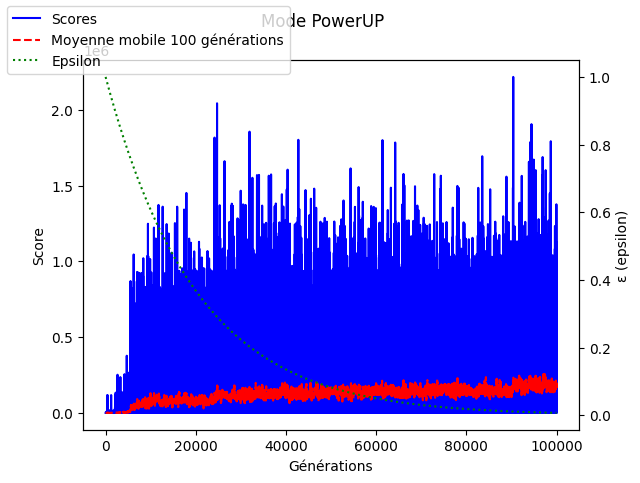

Lancement d'une partie avec les meilleurs coefficients ...


In [16]:
train_2_decisions(run_game_function=run_game_powerUP, weight_size=(7, 7), generations=100000, epsilon=1, epsilon_decay=0.99995, name="Mode PowerUP", nameOfTheFile="jeuPowerUP.py")

# Smart batches

In [10]:
import random
import matplotlib.pyplot as plt
import json
import tempfile
import subprocess

def train_2_decisions_batches(run_game_function, weight_size, generations=1000, epsilon=0, epsilon_decay=1, name="No Name", nameOfTheFile="jeuPowerUP.py", batch_size=10):
    weight_size_jump, weight_size_invincibility = weight_size

    best_weights_jump = [random.uniform(-1, 1) for _ in range(weight_size_jump)]
    best_weights_powerUP = [random.uniform(-1, 1) for _ in range(weight_size_invincibility)]
    best_score = float('-inf')  # la meilleure moyenne des 5 pires

    epsilon_min = 0
    scores = []        # moyennes des 5 pires du batch
    moving_avg = []    # moyennes mobiles
    epsilons = []

    for gen in range(generations):
        epsilons.append(epsilon)

        if random.random() < epsilon:
            weights_jump = [random.uniform(-2, 2) for _ in range(weight_size_jump)]
            weights_invincibility = [random.uniform(-2, 2) for _ in range(weight_size_invincibility)]
        else:
            weights_jump = [w + random.uniform(-0.2, 0.2) for w in best_weights_jump]
            weights_invincibility = [w + random.uniform(-0.2, 0.2) for w in best_weights_powerUP]

        batch_scores = [run_game_function(weights_jump, weights_invincibility) for _ in range(batch_size)]

        sorted_scores = sorted(batch_scores)
        avg_worst_5 = sum(sorted_scores[:10]) / 10

        scores.append(avg_worst_5)
        moving_avg.append(sum(scores[-100:]) / min(len(scores), 100))

        print(f"Génération {gen} | Moyenne des 5 pires: {avg_worst_5:.2f} | ε={epsilon:.4f}")

        if avg_worst_5 > best_score:
            best_score = avg_worst_5
            best_weights_jump = weights_jump
            best_weights_powerUP = weights_invincibility
            print("🎉 Nouveau meilleur batch basé sur la moyenne des 5 pires:", best_score)

        epsilon = max(epsilon_min, epsilon * epsilon_decay)


    print("\n--- Entraînement terminé ---")
    print("Meilleur score (moyenne des 5 pires):", best_score)
    print("Poids saut :", best_weights_jump)
    print("Poids power up :", best_weights_powerUP)

    final_weights = (best_weights_jump, best_weights_powerUP)

    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Générations")
    ax1.set_ylabel("Moyenne des 5 pires")
    ax1.plot(scores, label="Moyenne des 5 pires", color='blue')
    ax1.plot(moving_avg, label="Moyenne mobile", color='red', linestyle='dashed')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    ax2.set_ylabel("ε (epsilon)")
    ax2.plot(epsilons, label="Epsilon", color='green', linestyle='dotted')
    ax2.tick_params(axis='y')

    fig.suptitle(name)
    fig.legend(loc='upper left')
    plt.show()

    print("Lancement d'une partie avec les meilleurs coefficients ...")

    with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.json') as f:
        json.dump(final_weights, f)
        temp_file_path = f.name

    subprocess.run(["python", nameOfTheFile, temp_file_path])


Génération 0 | Moyenne des 5 pires: 44.80 | ε=1.0000
🎉 Nouveau meilleur batch basé sur la moyenne des 5 pires: 44.8
Génération 1 | Moyenne des 5 pires: 956.40 | ε=0.9999
🎉 Nouveau meilleur batch basé sur la moyenne des 5 pires: 956.4
Génération 2 | Moyenne des 5 pires: 31.60 | ε=0.9998
Génération 3 | Moyenne des 5 pires: 41.00 | ε=0.9997
Génération 4 | Moyenne des 5 pires: 41.00 | ε=0.9996
Génération 5 | Moyenne des 5 pires: 31.60 | ε=0.9995
Génération 6 | Moyenne des 5 pires: 46.70 | ε=0.9994
Génération 7 | Moyenne des 5 pires: 36.30 | ε=0.9993
Génération 8 | Moyenne des 5 pires: 41.00 | ε=0.9992
Génération 9 | Moyenne des 5 pires: 31.80 | ε=0.9991
Génération 10 | Moyenne des 5 pires: 31.70 | ε=0.9990
Génération 11 | Moyenne des 5 pires: 41.00 | ε=0.9989
Génération 12 | Moyenne des 5 pires: 39564.60 | ε=0.9988
🎉 Nouveau meilleur batch basé sur la moyenne des 5 pires: 39564.6
Génération 13 | Moyenne des 5 pires: 31.70 | ε=0.9987
Génération 14 | Moyenne des 5 pires: 721.10 | ε=0.9986
Gé

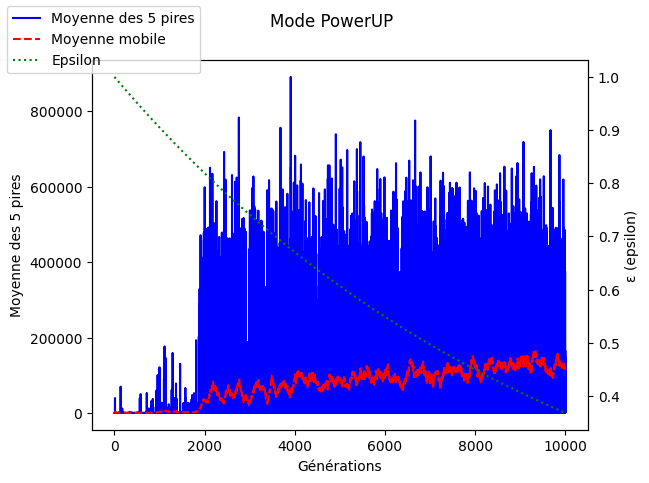

Lancement d'une partie avec les meilleurs coefficients ...


In [ ]:
train_2_decisions_batches(run_game_function=run_game_powerUP, weight_size=(7,7) , generations=4000, epsilon=1, epsilon_decay=0.9999, name="Mode PowerUP", nameOfTheFile="jeuPowerUP.py")